In [1]:
%matplotlib inline
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
#from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import RBFClassifier, make_model_gkernel3, make_model_gkernel1

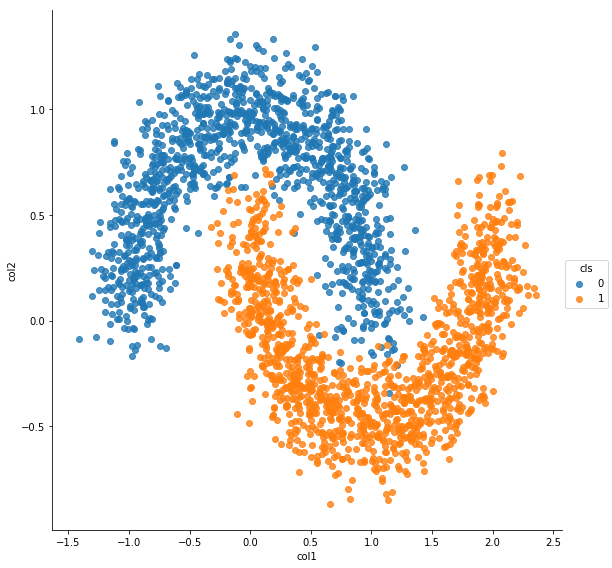

In [3]:
from sklearn.datasets import make_moons

n_samples = 2500
X, y = make_moons(n_samples=n_samples, noise=.15, random_state=0)
df = pd.DataFrame(X)
df.columns = ["col1", "col2"]
df['cls'] = y

sns.lmplot("col1", "col2", hue="cls", data=df, fit_reg=False, size=8)

In [4]:
X.shape, X.min(), X.max()

((2500, 2), -1.4162335410213718, 2.3583974973883515)

In [5]:
y.shape

(2500,)

In [6]:
N = y.shape[0]
y2 = keras.utils.to_categorical(y, num_classes=2)
y2.shape
index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = y2[index[index % 2 == 0]]

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import joblib

from lightgbm import LGBMClassifier

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
def f1_scorer(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(y, pred, average='macro')
    return s

## confirm vector input and matrix input

In [10]:
clf = RBFClassifier(
    num_lm=10,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 10)],
    make_model_gkernel=make_model_gkernel3,
    reg_l1=0.00,
    gamma='scale',
    #lr=0.02,
    random_state=101
)
clf

### matrix input

In [11]:
ytrain[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
%%time
hst = clf.fit(xtrain, ytrain, epochs=500, batch_size=250, verbose=0)

W1005 08:51:03.838617 140079067391808 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1005 08:51:03.841332 140079067391808 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1005 08:51:03.873718 140079067391808 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1005 08:51:03.874762 140079067391808 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: T

CPU times: user 3.3 s, sys: 75.4 ms, total: 3.37 s
Wall time: 3 s


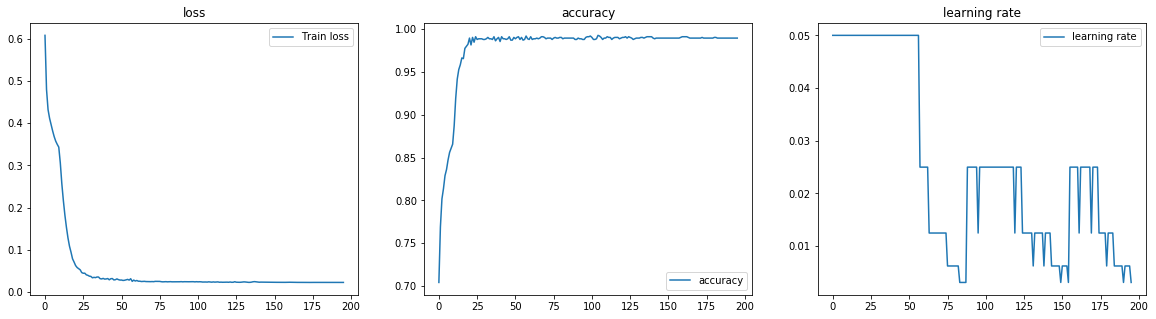

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [14]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'gamma': 'scale',
 'lm': array([[ 0.8548924 ,  0.23048269],
        [ 2.04018938, -0.03542258],
        [ 0.74432736,  0.62100174],
        [ 0.60397746,  0.91153575],
        [ 1.22683767, -0.69965271],
        [ 1.20995896,  0.0883075 ],
        [ 1.36644166, -0.39506721],
        [ 1.92460804, -0.15089506],
        [ 0.57434481,  0.5667343 ],
        [ 0.69184708, -0.24300195]]),
 'loss': None,
 'lr': None,
 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3>,
 'nn': None,
 'num_cls': 2,
 'num_lm': 10,
 'random_state': 101,
 'reg_l1': 0.0}

In [15]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'gamma': 'scale',
 'lm': array([[ 0.8548924 ,  0.23048269],
        [ 2.04018938, -0.03542258],
        [ 0.74432736,  0.62100174],
        [ 0.60397746,  0.91153575],
        [ 1.22683767, -0.69965271],
        [ 1.20995896,  0.0883075 ],
        [ 1.36644166, -0.39506721],
        [ 1.92460804, -0.15089506],
        [ 0.57434481,  0.5667343 ],
        [ 0.69184708, -0.24300195]]),
 'loss': None,
 'lr': None,
 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3>,
 'nn': None,
 'num_cls': 2,
 'num_lm': 10,
 'random_state': 101,
 'reg_l1': 0.0}

In [16]:
clf.current_gamma()

2.6610887

In [17]:
clf.predict(xtrain)[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [18]:
clf.predict_proba(xtrain)[:5]

array([[1.4852715e-04, 9.9985147e-01],
       [9.9978846e-01, 2.1157568e-04],
       [1.9582298e-02, 9.8041773e-01],
       [9.9195451e-01, 8.0455504e-03],
       [9.7877264e-01, 2.1227391e-02]], dtype=float32)

In [19]:
clf.score(xtrain, ytrain)

1250/1250 [==============================] - 0s 140us/step


0.9896

In [20]:
clf.score(xtest, yans)

1250/1250 [==============================] - 0s 21us/step


0.9912

In [21]:
print('F1_SCORE :', f1_score(np.argmax(ytrain,axis=1), clf.predict(xtrain), average='macro'))
print(classification_report(np.argmax(ytrain,axis=1), clf.predict(xtrain)))
print(confusion_matrix(np.argmax(ytrain,axis=1), clf.predict(xtrain)))

F1_SCORE : 0.9895700351281217
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  6 652]]


In [22]:
print('F1_SCORE :', f1_score(np.argmax(yans,axis=1), clf.predict(xtest), average='macro'))
print(classification_report(np.argmax(yans,axis=1), clf.predict(xtest)))
print(confusion_matrix(np.argmax(yans,axis=1), clf.predict(xtest)))

F1_SCORE : 0.9911789933018087
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[650   8]
 [  3 589]]


In [23]:
lm = clf.current_lm()
lm.shape

(10, 2)

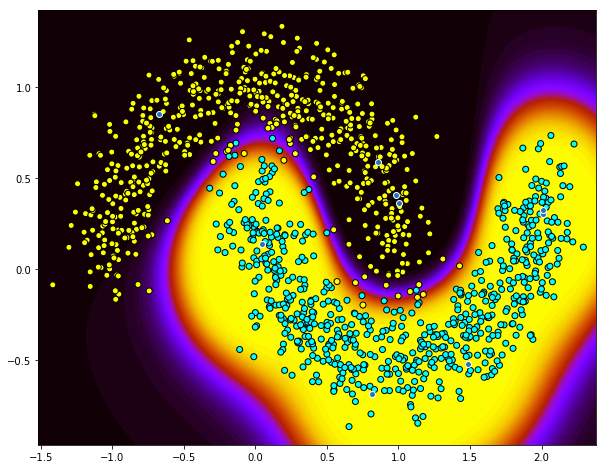

In [24]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], cmap=cm_bright, edgecolors='w')

### vector input

In [25]:
np.argmax(ytrain, axis=1)[:5]

array([1, 0, 1, 0, 0])

In [26]:
%%time
hst = clf.fit(xtrain, np.argmax(ytrain, axis=1), epochs=500, batch_size=250, verbose=0)

CPU times: user 3.61 s, sys: 81.5 ms, total: 3.7 s
Wall time: 3.22 s


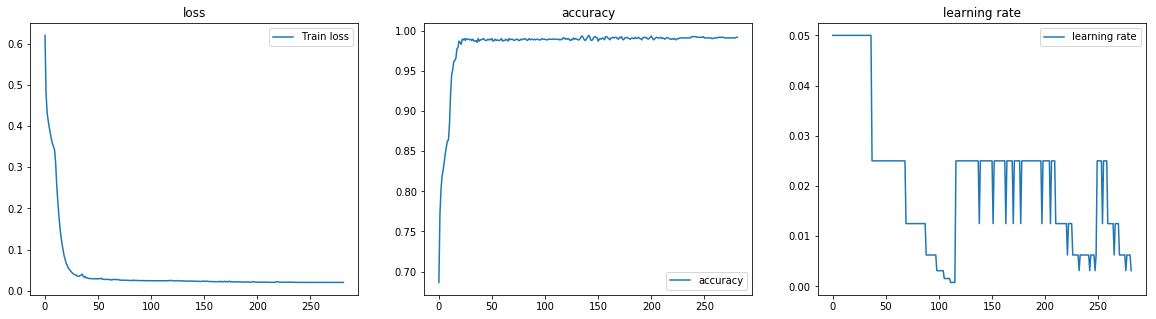

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [28]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'gamma': 'scale',
 'lm': array([[ 0.8548924 ,  0.23048269],
        [ 2.04018938, -0.03542258],
        [ 0.74432736,  0.62100174],
        [ 0.60397746,  0.91153575],
        [ 1.22683767, -0.69965271],
        [ 1.20995896,  0.0883075 ],
        [ 1.36644166, -0.39506721],
        [ 1.92460804, -0.15089506],
        [ 0.57434481,  0.5667343 ],
        [ 0.69184708, -0.24300195]]),
 'loss': None,
 'lr': None,
 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3>,
 'nn': None,
 'num_cls': 2,
 'num_lm': 10,
 'random_state': 101,
 'reg_l1': 0.0}

In [29]:
clf.current_gamma()

2.9274921

In [30]:
clf.predict(xtrain)[:10]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [31]:
clf.predict_proba(xtrain)[:5]

array([[3.9850955e-05, 9.9996018e-01],
       [9.9865156e-01, 1.3484650e-03],
       [2.1829400e-02, 9.7817057e-01],
       [9.9689025e-01, 3.1097357e-03],
       [9.7190440e-01, 2.8095601e-02]], dtype=float32)

In [32]:
clf.score(xtrain, np.argmax(ytrain, axis=1))

1250/1250 [==============================] - 0s 126us/step


0.9912

In [33]:
clf.score(xtest, np.argmax(yans,axis=1))

1250/1250 [==============================] - 0s 25us/step


0.992

In [34]:
print('F1_SCORE :', f1_score(np.argmax(ytrain,axis=1), clf.predict(xtrain), average='macro'))
print(classification_report(np.argmax(ytrain,axis=1), clf.predict(xtrain)))
print(confusion_matrix(np.argmax(ytrain,axis=1), clf.predict(xtrain)))

F1_SCORE : 0.991173104095102
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  4 654]]


In [35]:
print('F1_SCORE :', f1_score(np.argmax(yans,axis=1), clf.predict(xtest), average='macro'))
print(classification_report(np.argmax(yans,axis=1), clf.predict(xtest)))
print(confusion_matrix(np.argmax(yans,axis=1), clf.predict(xtest)))

F1_SCORE : 0.9919802701814897
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  3 589]]


In [36]:
lm = clf.current_lm()
lm.shape

(10, 2)

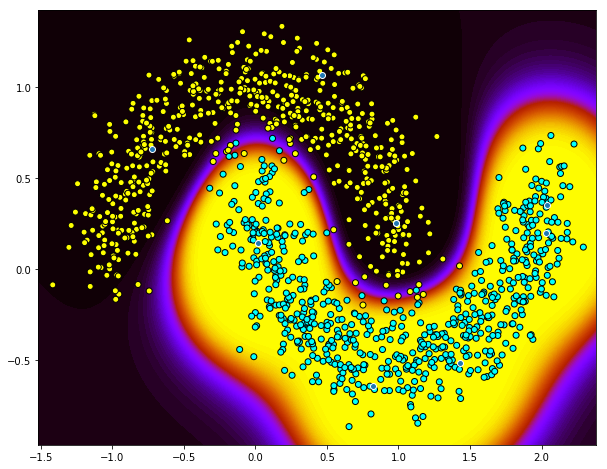

In [37]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], cmap=cm_bright, edgecolors='w')

In [38]:
clf.sk_params

{'callbacks': None,
 'epochs_warmup': 10,
 'gamma': 'scale',
 'lm': array([[ 0.8548924 ,  0.23048269],
        [ 2.04018938, -0.03542258],
        [ 0.74432736,  0.62100174],
        [ 0.60397746,  0.91153575],
        [ 1.22683767, -0.69965271],
        [ 1.20995896,  0.0883075 ],
        [ 1.36644166, -0.39506721],
        [ 1.92460804, -0.15089506],
        [ 0.57434481,  0.5667343 ],
        [ 0.69184708, -0.24300195]]),
 'loss': None,
 'lr': None,
 'make_model_gkernel': <function keras_ex.gkernel.sklearn.make_model_gkernel3>,
 'nn': None,
 'num_cls': 2,
 'num_lm': 10,
 'random_state': 101,
 'reg_l1': 0.0}

## BENCHMARK LogisticRegression

In [39]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [40]:
param_name = "C"
param_range = np.logspace(-3, 3, 7)
param_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [41]:
%%time

train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', max_iter=10000),
    xtrain, np.argmax(ytrain, axis=1),
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer)

[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   0.0s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   0.0s
[CV] C=100.0 .........................................................
[CV] .......................................... C=100.0, total=   0.0s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [42]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[1.00000000e-03, 3.36967655e-01, 3.37171064e-01],
       [1.00000000e-02, 8.45719949e-01, 8.42215596e-01],
       [1.00000000e-01, 8.85580495e-01, 8.67805089e-01],
       [1.00000000e+00, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+01, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+02, 8.89309088e-01, 8.71608912e-01],
       [1.00000000e+03, 8.89309088e-01, 8.70826707e-01]])

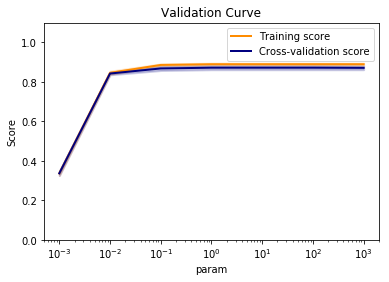

In [43]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [44]:
'''test data'''
est = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', max_iter=10000, C=1.0)
est.fit(xtrain, np.argmax(ytrain, axis=1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
pred = est.predict(xtrain)

In [46]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.8820611664487606
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       592
           1       0.89      0.89      0.89       658

   micro avg       0.88      0.88      0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250

[[518  74]
 [ 73 585]]


In [47]:
pred_test = est.predict(xtest)

In [48]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.8781376352030869
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       658
           1       0.87      0.88      0.87       592

   micro avg       0.88      0.88      0.88      1250
   macro avg       0.88      0.88      0.88      1250
weighted avg       0.88      0.88      0.88      1250

[[578  80]
 [ 72 520]]


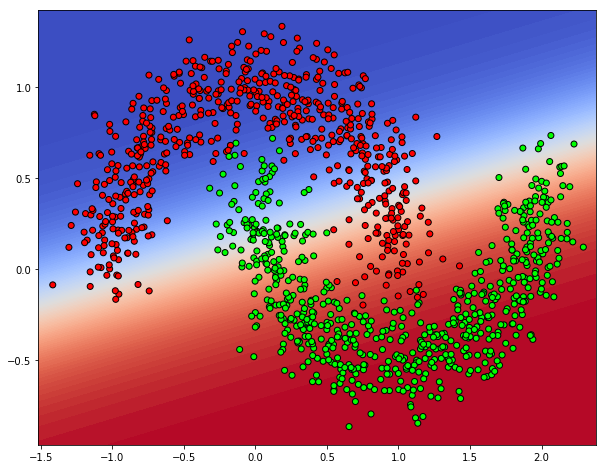

In [49]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')

## BENCHMARK LGBMClassifier

In [50]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [51]:
param_name = "reg_alpha"
param_range = np.logspace(-3, 3, 7)
param_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [52]:
%%time

train_scores, test_scores = validation_curve(
    LGBMClassifier(
        min_child_samples=20,
        reg_alpha=0.1
    ),
    xtrain, np.argmax(ytrain, axis=1),
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer)

[CV] reg_alpha=0.001 .................................................
[CV] .................................. reg_alpha=0.001, total=   0.0s
[CV] reg_alpha=0.01 ..................................................
[CV] ................................... reg_alpha=0.01, total=   0.0s
[CV] reg_alpha=0.1 ...................................................
[CV] .................................... reg_alpha=0.1, total=   0.0s
[CV] reg_alpha=1.0 ...................................................
[CV] .................................... reg_alpha=1.0, total=   0.0s
[CV] reg_alpha=10.0 ..................................................
[CV] ................................... reg_alpha=10.0, total=   0.0s
[CV] reg_alpha=100.0 .................................................
[CV] .................................. reg_alpha=100.0, total=   0.0s
[CV] reg_alpha=1000.0 ................................................
[CV] ................................. reg_alpha=1000.0, total=   0.0s
[CV] r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [53]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[1.00000000e-03, 9.88896987e-01, 9.79398045e-01],
       [1.00000000e-02, 9.88896987e-01, 9.79398045e-01],
       [1.00000000e-01, 9.88896987e-01, 9.79398045e-01],
       [1.00000000e+00, 9.86435338e-01, 9.78642261e-01],
       [1.00000000e+01, 9.28995934e-01, 9.19459727e-01],
       [1.00000000e+02, 8.65500708e-01, 8.37626478e-01],
       [1.00000000e+03, 3.21637427e-01, 3.20930233e-01]])

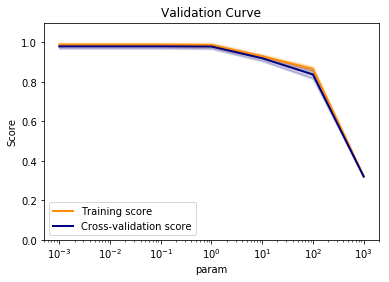

In [54]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [55]:
'''test data'''
est = LGBMClassifier(
        min_child_samples=20,
        reg_alpha=0.1
    )
est.fit(xtrain, np.argmax(ytrain, axis=1))

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=5, min_split_gain=0, n_estimators=10, nthread=-1,
        num_leaves=31, objective='binary', reg_alpha=0.1, reg_lambda=0,
        seed=0, silent=True, subsample=1, subsample_for_bin=50000,
        subsample_freq=1)

In [56]:
pred = est.predict(xtrain)

In [57]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9935831786879397
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       1.00      0.99      0.99       658

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[589   3]
 [  5 653]]


In [58]:
pred_test = est.predict(xtest)

In [59]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9903747680319096
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       658
           1       0.99      0.99      0.99       592

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[651   7]
 [  5 587]]


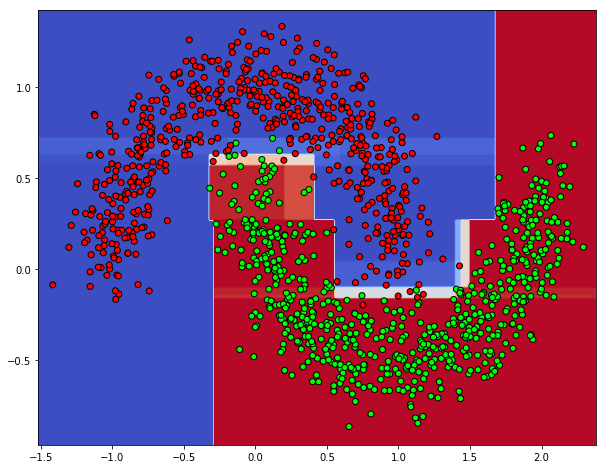

In [60]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

cm = plt.cm.coolwarm
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')

## validation_curve + RBFClassifier
* looking for valid num_lm

In [61]:
cv_splitter = StratifiedShuffleSplit(n_splits=3, test_size=0.35, random_state=0)
cv_splitter.get_n_splits(xtrain, ytrain)

3

In [62]:
param_name = "num_lm"
param_range = [2, 5, 10, 20, 50, 100, 150, 200, 250, 300]
param_range

[2, 5, 10, 20, 50, 100, 150, 200, 250, 300]

In [63]:
%%time

def f1_scorer_2(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(np.argmax(y, axis=1), pred, average='macro')
    return s

train_scores, test_scores = validation_curve(
    RBFClassifier(
        num_lm=2,
        lm_select_from_x=True,
        random_state=None,
        lr=0.05, gamma='scale',
        epochs=500, batch_size=250, verbose=0
    ),
    xtrain, ytrain,
    param_name=param_name, param_range=param_range,
    cv=cv_splitter, n_jobs=1, verbose=2, scoring=f1_scorer_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] num_lm=2 ........................................................
[CV] ......................................... num_lm=2, total=   3.9s
[CV] num_lm=5 ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ......................................... num_lm=5, total=   3.4s
[CV] num_lm=10 .......................................................
[CV] ........................................ num_lm=10, total=   5.8s
[CV] num_lm=20 .......................................................
[CV] ........................................ num_lm=20, total=   3.6s
[CV] num_lm=50 .......................................................
[CV] ........................................ num_lm=50, total=   3.0s
[CV] num_lm=100 ......................................................
[CV] ....................................... num_lm=100, total=   3.4s
[CV] num_lm=150 ......................................................
[CV] ....................................... num_lm=150, total=   3.5s
[CV] num_lm=200 ......................................................
[CV] ....................................... num_lm=200, total=   4.7s
[CV] num_lm=250 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.1min finished


In [64]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
np.c_[param_range, train_scores_mean, test_scores_mean]

array([[  2.        ,   0.81765432,   0.82295794],
       [  5.        ,   0.96173174,   0.95804618],
       [ 10.        ,   0.97942421,   0.9786243 ],
       [ 20.        ,   0.98971142,   0.98854742],
       [ 50.        ,   0.99217903,   0.98930922],
       [100.        ,   0.99135581,   0.99007452],
       [150.        ,   0.99176779,   0.98930922],
       [200.        ,   0.99176779,   0.98930922],
       [250.        ,   0.9909453 ,   0.98930922],
       [300.        ,   0.99012124,   0.98930922]])

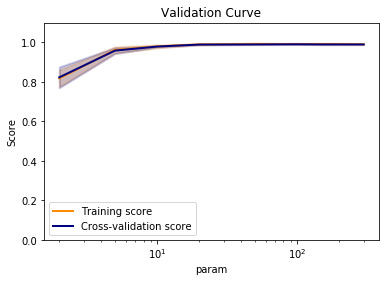

In [65]:
plt.title("Validation Curve")
plt.xlabel("param")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")

In [66]:
%%time
'''test data'''
est = RBFClassifier(
    num_lm=50,
    lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma='scale',
    epochs=500, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 3.25 s, sys: 39.7 ms, total: 3.29 s
Wall time: 2.94 s


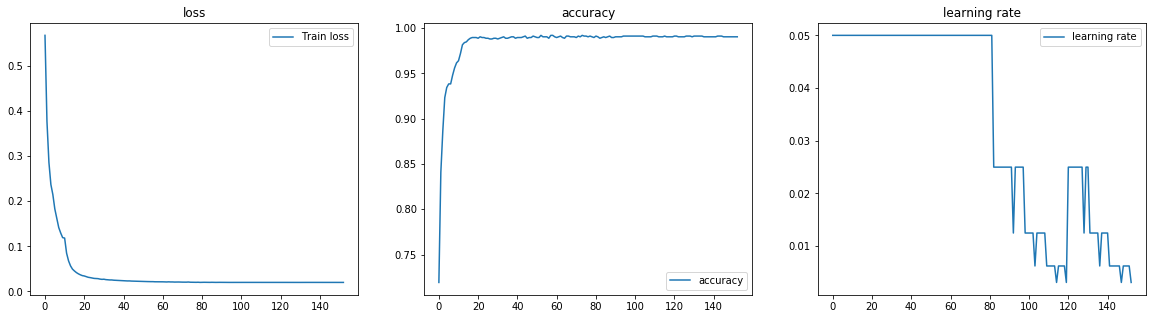

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [68]:
pred = est.predict(xtrain)

In [69]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.991173104095102
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  4 654]]


In [70]:
pred_test = est.predict(xtest)

In [71]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9911789933018087
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.99      0.99      0.99       592

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[650   8]
 [  3 589]]


In [72]:
lm = est.current_lm()
lm.shape

(50, 2)

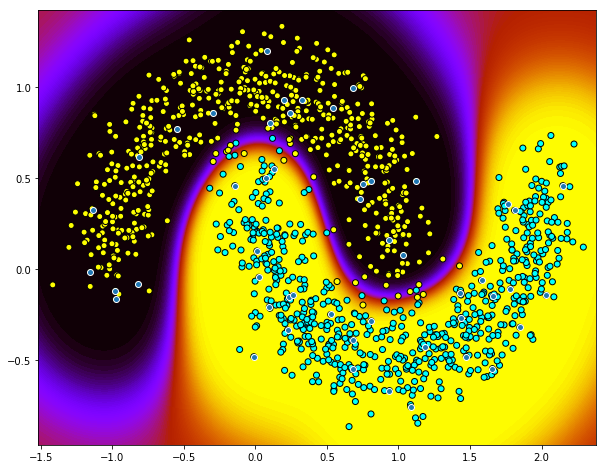

In [73]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(lm[:,0], lm[:,1], cmap=cm_bright, edgecolors='w')

In [74]:
num_lm = 50
x_min, x_max = xtrain[:, 0].min(), xtrain[:, 0].max()
y_min, y_max = xtrain[:, 1].min(), xtrain[:, 1].max()

init_lm = np.c_[
    np.random.random((num_lm,))*(x_max-x_min)+x_min,
    np.random.random((num_lm,))*(y_max-y_min)+y_min
]

## set gamma to 'scale' (no train)

In [75]:
%%time
est = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma='scale',
    make_model_gkernel=make_model_gkernel1,
    epochs=500, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 4.73 s, sys: 102 ms, total: 4.84 s
Wall time: 4.12 s


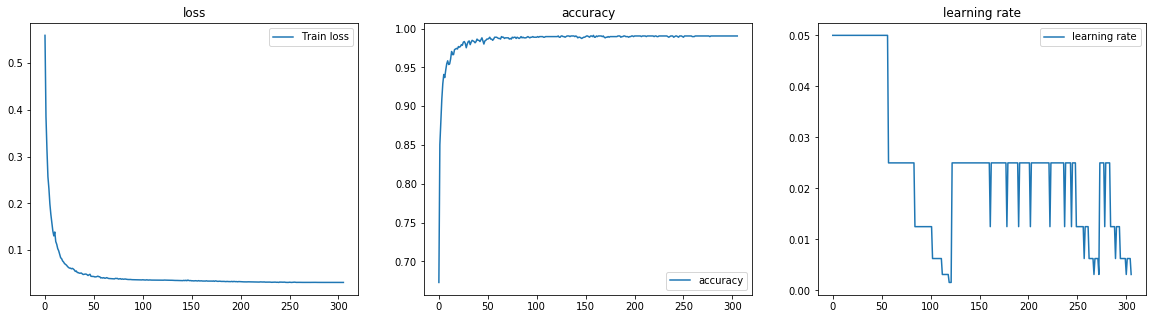

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [77]:
est.current_gamma(), 1 / (2*xtrain.var())

(0.9167896, 0.916789619521976)

In [78]:
pred = est.predict(xtrain)

In [79]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9903715058194618
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       658

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[585   7]
 [  5 653]]


In [80]:
pred_test = est.predict(xtest)

In [81]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.991176140283326
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       658
           1       0.99      0.99      0.99       592

   micro avg       0.99      0.99      0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

[[652   6]
 [  5 587]]


In [82]:
lm = est.current_lm()
lm.shape

(50, 2)

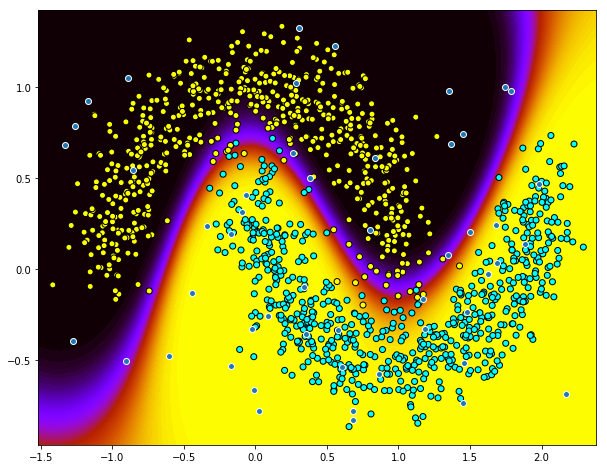

In [83]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(init_lm[:,0], init_lm[:,1], cmap=cm_bright, edgecolors='w')

## set gamma to None (no train)

In [84]:
%%time
est = RBFClassifier(
    num_lm=num_lm,
    lm_select_from_x=True,
    random_state=None,
    lr=0.05, gamma=None,
    make_model_gkernel=make_model_gkernel1,
    epochs=500, batch_size=250, verbose=0
)
hst = est.fit(xtrain, ytrain)

CPU times: user 7.73 s, sys: 179 ms, total: 7.91 s
Wall time: 6.42 s


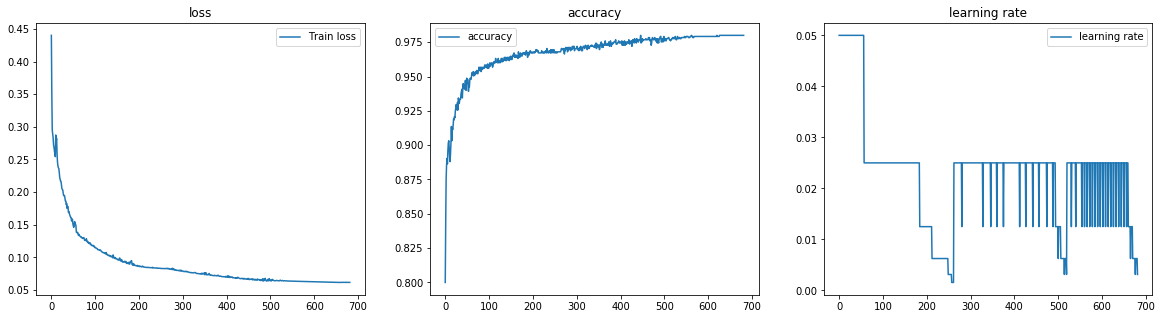

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [86]:
est.current_gamma(), 1/(2*np.sqrt(2/6)*2)

(0.4330127, 0.43301270189221935)

In [87]:
pred = est.predict(xtrain)

In [88]:
print('F1_SCORE :', f1_score(np.argmax(ytrain, axis=1), pred, average='macro'))
print(classification_report(np.argmax(ytrain, axis=1), pred))
print(confusion_matrix(np.argmax(ytrain, axis=1), pred))

F1_SCORE : 0.9799457733711957
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       592
           1       0.98      0.98      0.98       658

   micro avg       0.98      0.98      0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

[[580  12]
 [ 13 645]]


In [89]:
pred_test = est.predict(xtest)

In [90]:
print('F1_SCORE :', f1_score(np.argmax(yans, axis=1), pred_test, average='macro'))
print(classification_report(np.argmax(yans, axis=1), pred_test))
print(confusion_matrix(np.argmax(yans, axis=1), pred_test))

F1_SCORE : 0.9799457733711957
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       658
           1       0.98      0.98      0.98       592

   micro avg       0.98      0.98      0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

[[645  13]
 [ 12 580]]


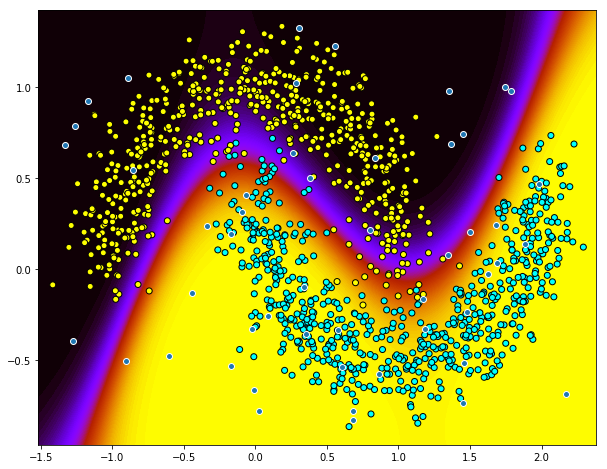

In [91]:
from matplotlib.colors import ListedColormap

h = .01
x_min, x_max = xtrain[:, 0].min() - .1, xtrain[:, 0].max() + .1
y_min, y_max = xtrain[:, 1].min() - .1, xtrain[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
y_pred = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])
y_pred

#cm = plt.cm.coolwarm
cm = plt.cm.gnuplot
cm_bright = ListedColormap(['#FFFF00', '#00FFFF'])
y_pred = y_pred[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, y_pred, 100, cmap=cm, alpha=1)
plt.scatter(xtrain[:,0], xtrain[:,1], c=np.argmax(ytrain, axis=1), cmap=cm_bright, edgecolors='k')
plt.scatter(init_lm[:,0], init_lm[:,1], cmap=cm_bright, edgecolors='w')